<a href="https://colab.research.google.com/github/darship19/Autism-Prediction-ML/blob/main/Autism_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Autism Prediction kaggle/train.csv')
print(df.head())

   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         0         1         1         1         1         0   
1   2         0         0         0         0         0         0         0   
2   3         1         1         1         1         1         1         0   
3   4         0         0         0         1         0         0         0   
4   5         0         0         0         0         1         0         0   

   A8_Score  A9_Score  ...  gender       ethnicity jaundice austim  \
0         1         1  ...       f  White-European       no     no   
1         0         0  ...       f     South Asian       no     no   
2         0         1  ...       f  White-European       no     no   
3         0         0  ...       f     South Asian       no     no   
4         0         1  ...       m           Black       no    yes   

    contry_of_res used_app_before     result     age_desc  relation Class/ASD  
0   United States       

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
df.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.00000,800.000000,800.00000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.582500,0.28625,0.321250,0.41500,0.457500,0.20875,0.273750,0.717500,0.316250,0.460000,28.612306,7.058530,0.231250
std,231.0844,0.493455,0.45229,0.467249,0.49303,0.498502,0.40667,0.446161,0.450497,0.465303,0.498709,12.872373,3.788969,0.421896
min,1.0000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,9.560505,-2.594654,0.000000
25%,200.7500,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,19.282082,4.527556,0.000000
50%,400.5000,1.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,25.479960,6.893472,0.000000
75%,600.2500,1.000000,1.00000,1.000000,1.00000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,33.154755,9.892981,0.000000
max,800.0000,1.000000,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,72.402488,13.390868,1.000000


Second Lab report:

A comprehensive study on your data including data visualisation, distribution analysis, correlation analysis.

In [ ]:
#print colums bane
column_names=df.columns
print(column_names)

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')


In [ ]:
#print target classes
df['Class/ASD'].value_counts()

,count
Class/ASD,
0,615
1,185


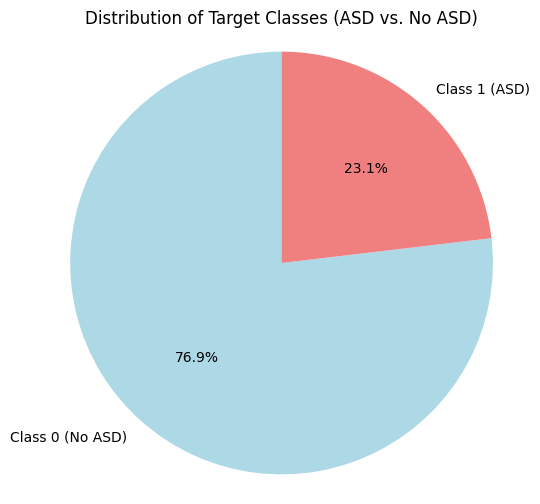

In [ ]:
import matplotlib.pyplot as plt


count = df['Class/ASD'].value_counts()
labels = ['Class 0 (No ASD)', 'Class 1 (ASD)']
sizes = count.values

#create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.axis('equal')
plt.title('Distribution of Target Classes (ASD vs. No ASD)')
plt.show()


In [ ]:
#handling the null values
df.isnull().sum()

,0
ID,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


In [ ]:
#handling the null values
df.isnull().sum().sum()

0

dataset has no null values


In [ ]:
#Check for duplicates
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
795,False
796,False
797,False
798,False


dataset has no duplicated values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
#check if its data type is 'object'
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Unique values in column '{column}':")
        print(df[column].unique())
        print("\n")


Unique values in column 'gender':
['f' 'm']


Unique values in column 'ethnicity':
['White-European' 'South Asian' 'Black' 'Asian' 'Middle Eastern ' '?'
 'others' 'Latino' 'Turkish' 'Others' 'Hispanic' 'Pasifika']


Unique values in column 'jaundice':
['no' 'yes']


Unique values in column 'austim':
['no' 'yes']


Unique values in column 'contry_of_res':
['United States' 'Australia' 'United Kingdom' 'New Zealand' 'Italy'
 'Nicaragua' 'Canada' 'United Arab Emirates' 'Netherlands' 'Sri Lanka'
 'India' 'Armenia' 'Sierra Leone' 'Argentina' 'Azerbaijan' 'Iceland'
 'Egypt' 'Serbia' 'Afghanistan' 'Costa Rica' 'Jordan' 'Angola' 'Pakistan'
 'Brazil' 'Ireland' 'Kazakhstan' 'Viet Nam' 'Ethiopia' 'Austria' 'Finland'
 'France' 'Malaysia' 'Japan' 'Spain' 'Philippines' 'Iran' 'Czech Republic'
 'Russia' 'Romania' 'Mexico' 'Belgium' 'Aruba' 'Uruguay' 'Indonesia'
 'Ukraine' 'AmericanSamoa' 'Germany' 'China' 'Iraq' 'Tonga' 'South Africa'
 'Saudi Arabia' 'Hong Kong' 'Bahamas' 'Ecuador' 'Cyprus' 'Banglades

In [ ]:
# Loop through each column and check if its data type is 'object'
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Value counts for column '{column}':")
        print(df[column].value_counts())
        print("\n")


Value counts for column 'gender':
gender
f    415
m    385
Name: count, dtype: int64


Value counts for column 'ethnicity':
ethnicity
White-European     211
?                  151
Asian              134
Middle Eastern     116
Black               45
Latino              44
South Asian         35
Others              24
Pasifika            18
Hispanic            16
Turkish              4
others               2
Name: count, dtype: int64


Value counts for column 'jaundice':
jaundice
no     604
yes    196
Name: count, dtype: int64


Value counts for column 'austim':
austim
no     683
yes    117
Name: count, dtype: int64


Value counts for column 'contry_of_res':
contry_of_res
United States           148
United Arab Emirates     94
New Zealand              93
India                    74
United Kingdom           58
                       ... 
Indonesia                 1
Tonga                     1
Iraq                      1
Finland                   1
Niger                     1
Name: count, 

In [ ]:
# Replace '?' with 'White-European' in the 'ethnicity' column
df['ethnicity'] = df['ethnicity'].replace('?', 'White-European')

# Verify the changes
print(df['ethnicity'].value_counts())


ethnicity
White-European     362
Asian              134
Middle Eastern     116
Black               45
Latino              44
South Asian         35
Others              24
Pasifika            18
Hispanic            16
Turkish              4
others               2
Name: count, dtype: int64


In [ ]:
#replace '?' with 'Self' in the 'relation' column
df['relation'] = df['relation'].replace('?', 'Self')

print(df['relation'].value_counts())


relation
Self                        694
Parent                       49
Relative                     43
Health care professional      7
Others                        7
Name: count, dtype: int64


In [ ]:
#convert the 'age' column from float to int
#to ensure the age is represented as an integer, since age in years is typically a whole number.
df['age'] = df['age'].astype(int)

print(df['age'].dtype)
print(df['age'].head())


int64
0    18
1    13
2    14
3    61
4    14
Name: age, dtype: int64


In [ ]:
#update the 'age_desc' column based on the 'age' values
#to ensure age categories are accurate and consistent with the actual age data.
df['age_desc'] = df['age'].apply(lambda x: 'Under 18' if x < 18 else '18 and more')

# Verify the changes
print(df[['age', 'age_desc']].head())


   age     age_desc
0   18  18 and more
1   13     Under 18
2   14     Under 18
3   61  18 and more
4   14     Under 18


In [ ]:
#set pandas to display all columns
pd.set_option('display.max_columns', None)
print(df.head())


   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         0         1         1         1         1         0   
1   2         0         0         0         0         0         0         0   
2   3         1         1         1         1         1         1         0   
3   4         0         0         0         1         0         0         0   
4   5         0         0         0         0         1         0         0   

   A8_Score  A9_Score  A10_Score  age gender       ethnicity jaundice austim  \
0         1         1          1   18      f  White-European       no     no   
1         0         0          1   13      f     South Asian       no     no   
2         0         1          1   14      f  White-European       no     no   
3         0         0          0   61      f     South Asian       no     no   
4         0         1          1   14      m           Black       no    yes   

    contry_of_res used_app_before     result

In [ ]:
# Categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

# Numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", numerical_columns)


Categorical Columns: Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'age_desc', 'relation'],
      dtype='object')
Numerical Columns: Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'result', 'Class/ASD'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
#list of categorical columns to encode
categorical_columns = ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
                       'used_app_before', 'age_desc', 'relation']

#loop through each column and apply LabelEncoder
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
print(df.head())


   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         0         1         1         1         1         0   
1   2         0         0         0         0         0         0         0   
2   3         1         1         1         1         1         1         0   
3   4         0         0         0         1         0         0         0   
4   5         0         0         0         0         1         0         0   

   A8_Score  A9_Score  A10_Score  age  gender  ethnicity  jaundice  austim  \
0         1         1          1   18       0          9         0       0   
1         0         0          1   13       0          7         0       0   
2         0         1          1   14       0          9         0       0   
3         0         0          0   61       0          7         0       0   
4         0         1          1   14       1          1         0       1   

   contry_of_res  used_app_before     result  age_desc  

## **Gender**

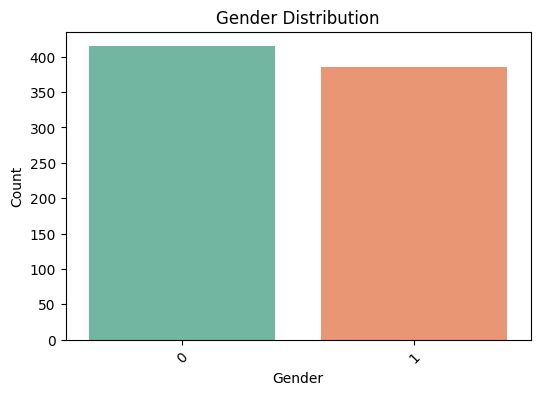

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', hue='gender', palette='Set2', legend=False)
plt.xticks(rotation=45)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()


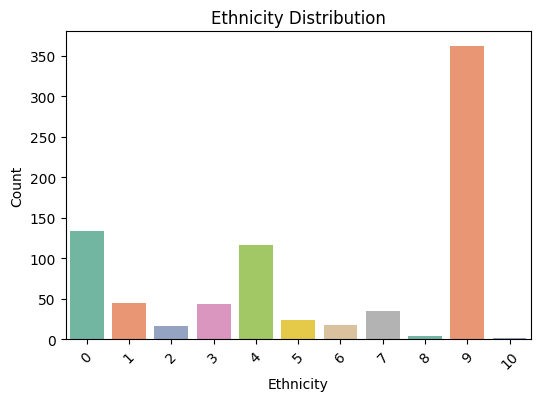

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='ethnicity', hue='ethnicity', palette='Set2', legend=False)
plt.xticks(rotation=45)
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.title('Ethnicity Distribution')
plt.show()


In [ ]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

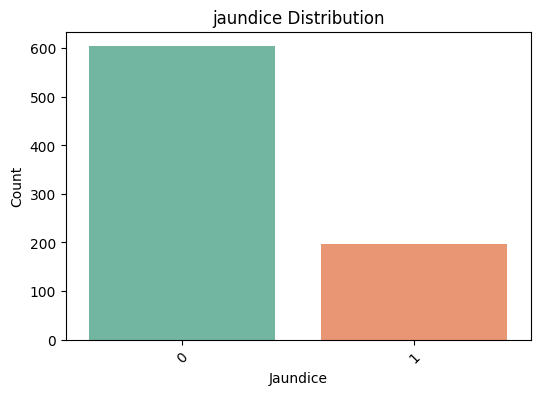

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='jaundice', hue='jaundice', palette='Set2', legend=False)
plt.xticks(rotation=45)
plt.xlabel('Jaundice')
plt.ylabel('Count')
plt.title('jaundice Distribution')
plt.show()


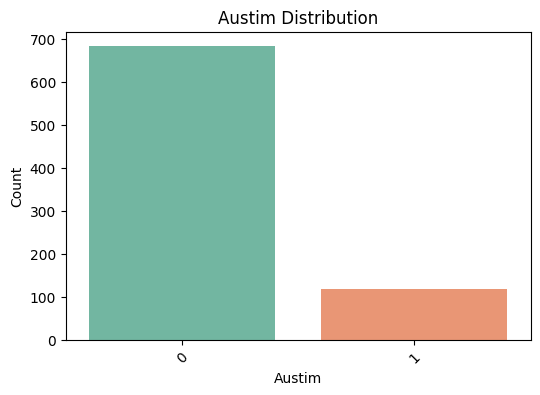

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='austim', hue='austim', palette='Set2', legend=False)
plt.xticks(rotation=45)
plt.xlabel('Austim')
plt.ylabel('Count')
plt.title('Austim Distribution')
plt.show()


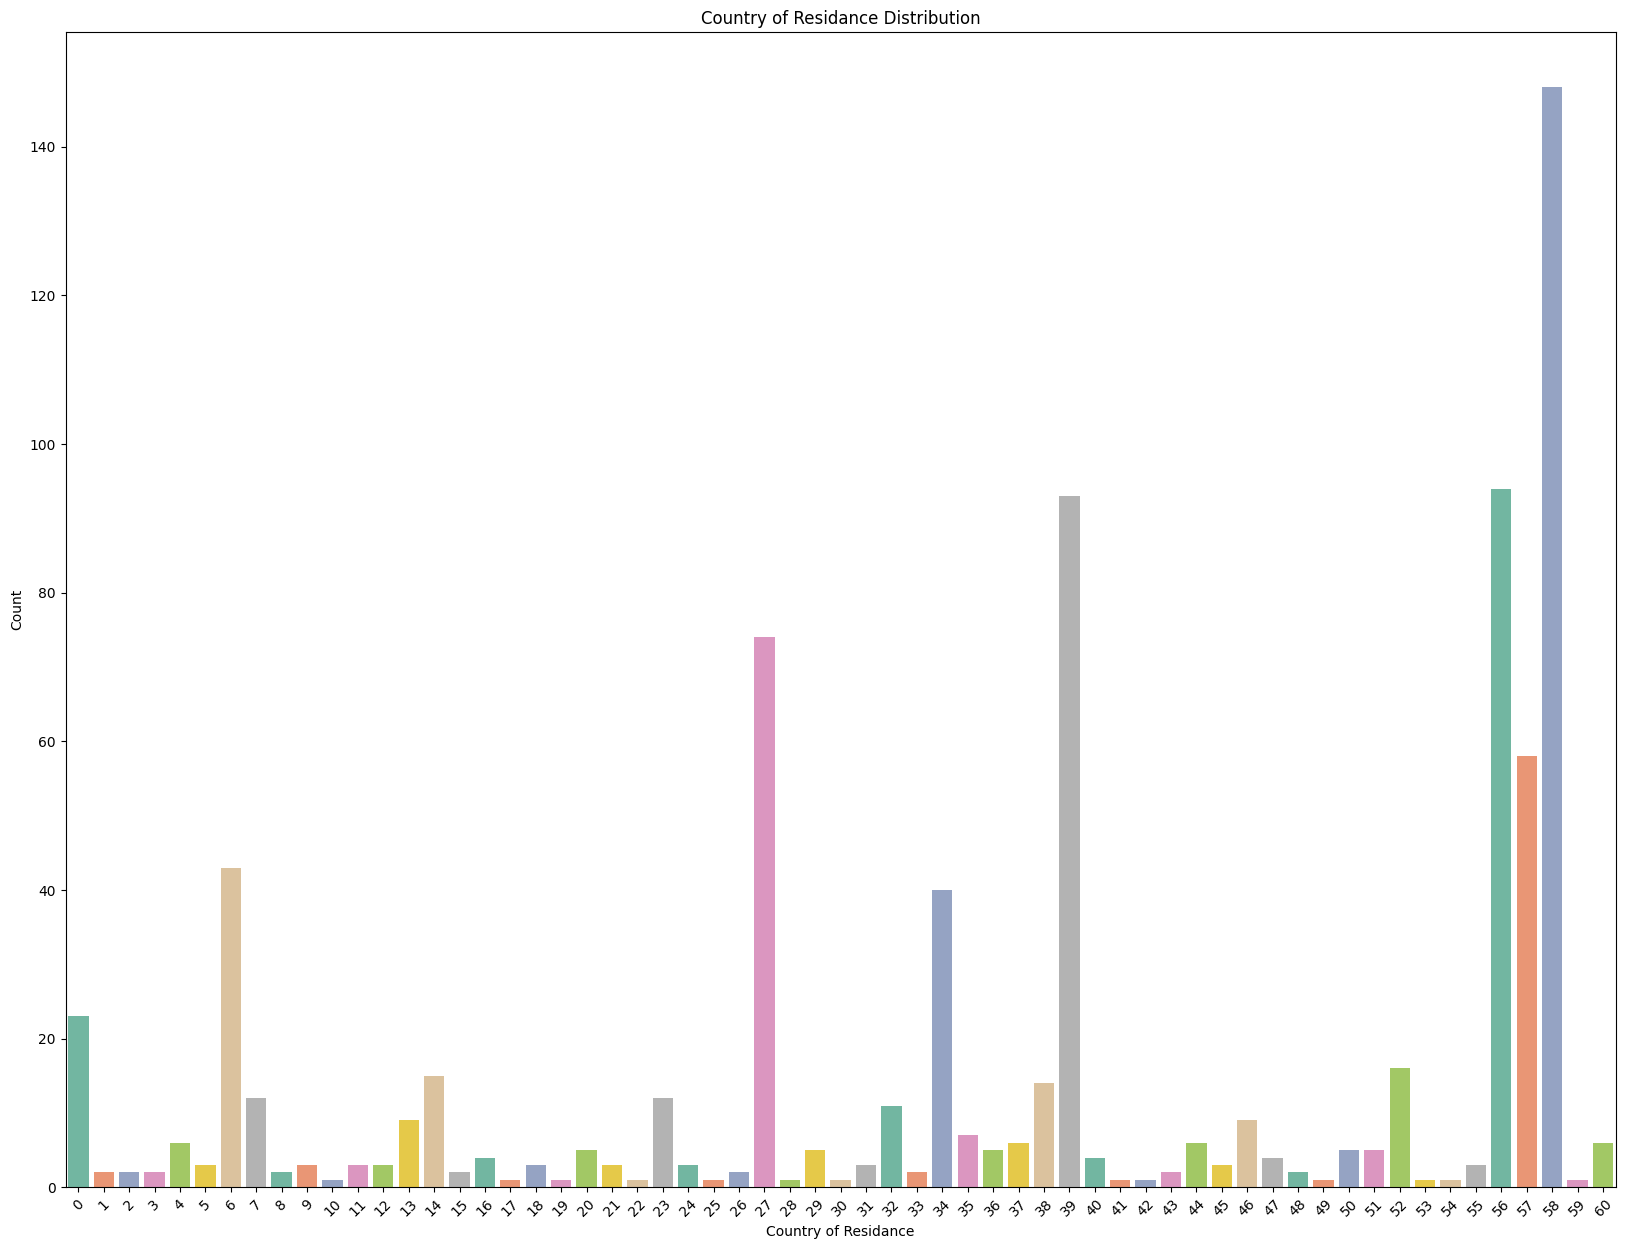

In [ ]:
plt.figure(figsize=(20, 15))
sns.countplot(data=df, x='contry_of_res', hue='contry_of_res', palette='Set2', legend=False)
plt.xticks(rotation=45)
plt.xlabel('Country of Residance')
plt.ylabel('Count')
plt.title('Country of Residance Distribution')
plt.show()


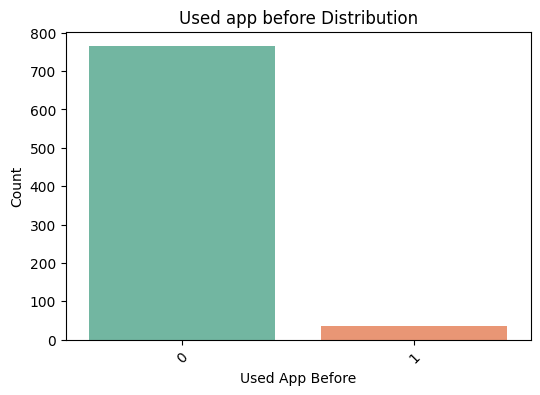

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='used_app_before', hue='used_app_before', palette='Set2', legend=False)
plt.xticks(rotation=45)
plt.xlabel('Used App Before')
plt.ylabel('Count')
plt.title('Used app before Distribution')
plt.show()


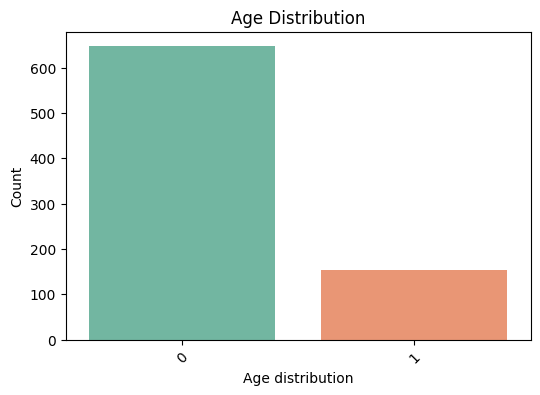

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='age_desc', hue='age_desc', palette='Set2', legend=False)
plt.xticks(rotation=45)
plt.xlabel('Age distribution')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()


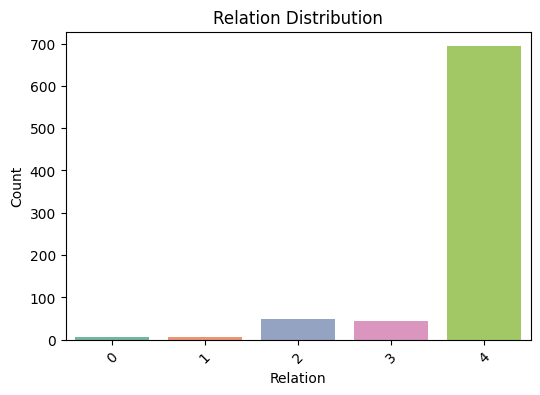

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='relation', hue='relation', palette='Set2', legend=False)
plt.xticks(rotation=45)
plt.xlabel('Relation')
plt.ylabel('Count')
plt.title('Relation Distribution')
plt.show()


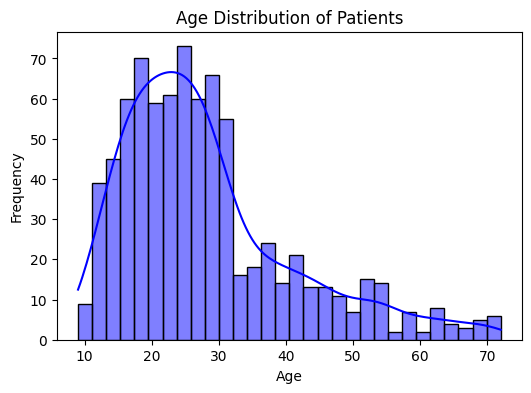

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Patients')
plt.show()


In [ ]:
import pandas as pd
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

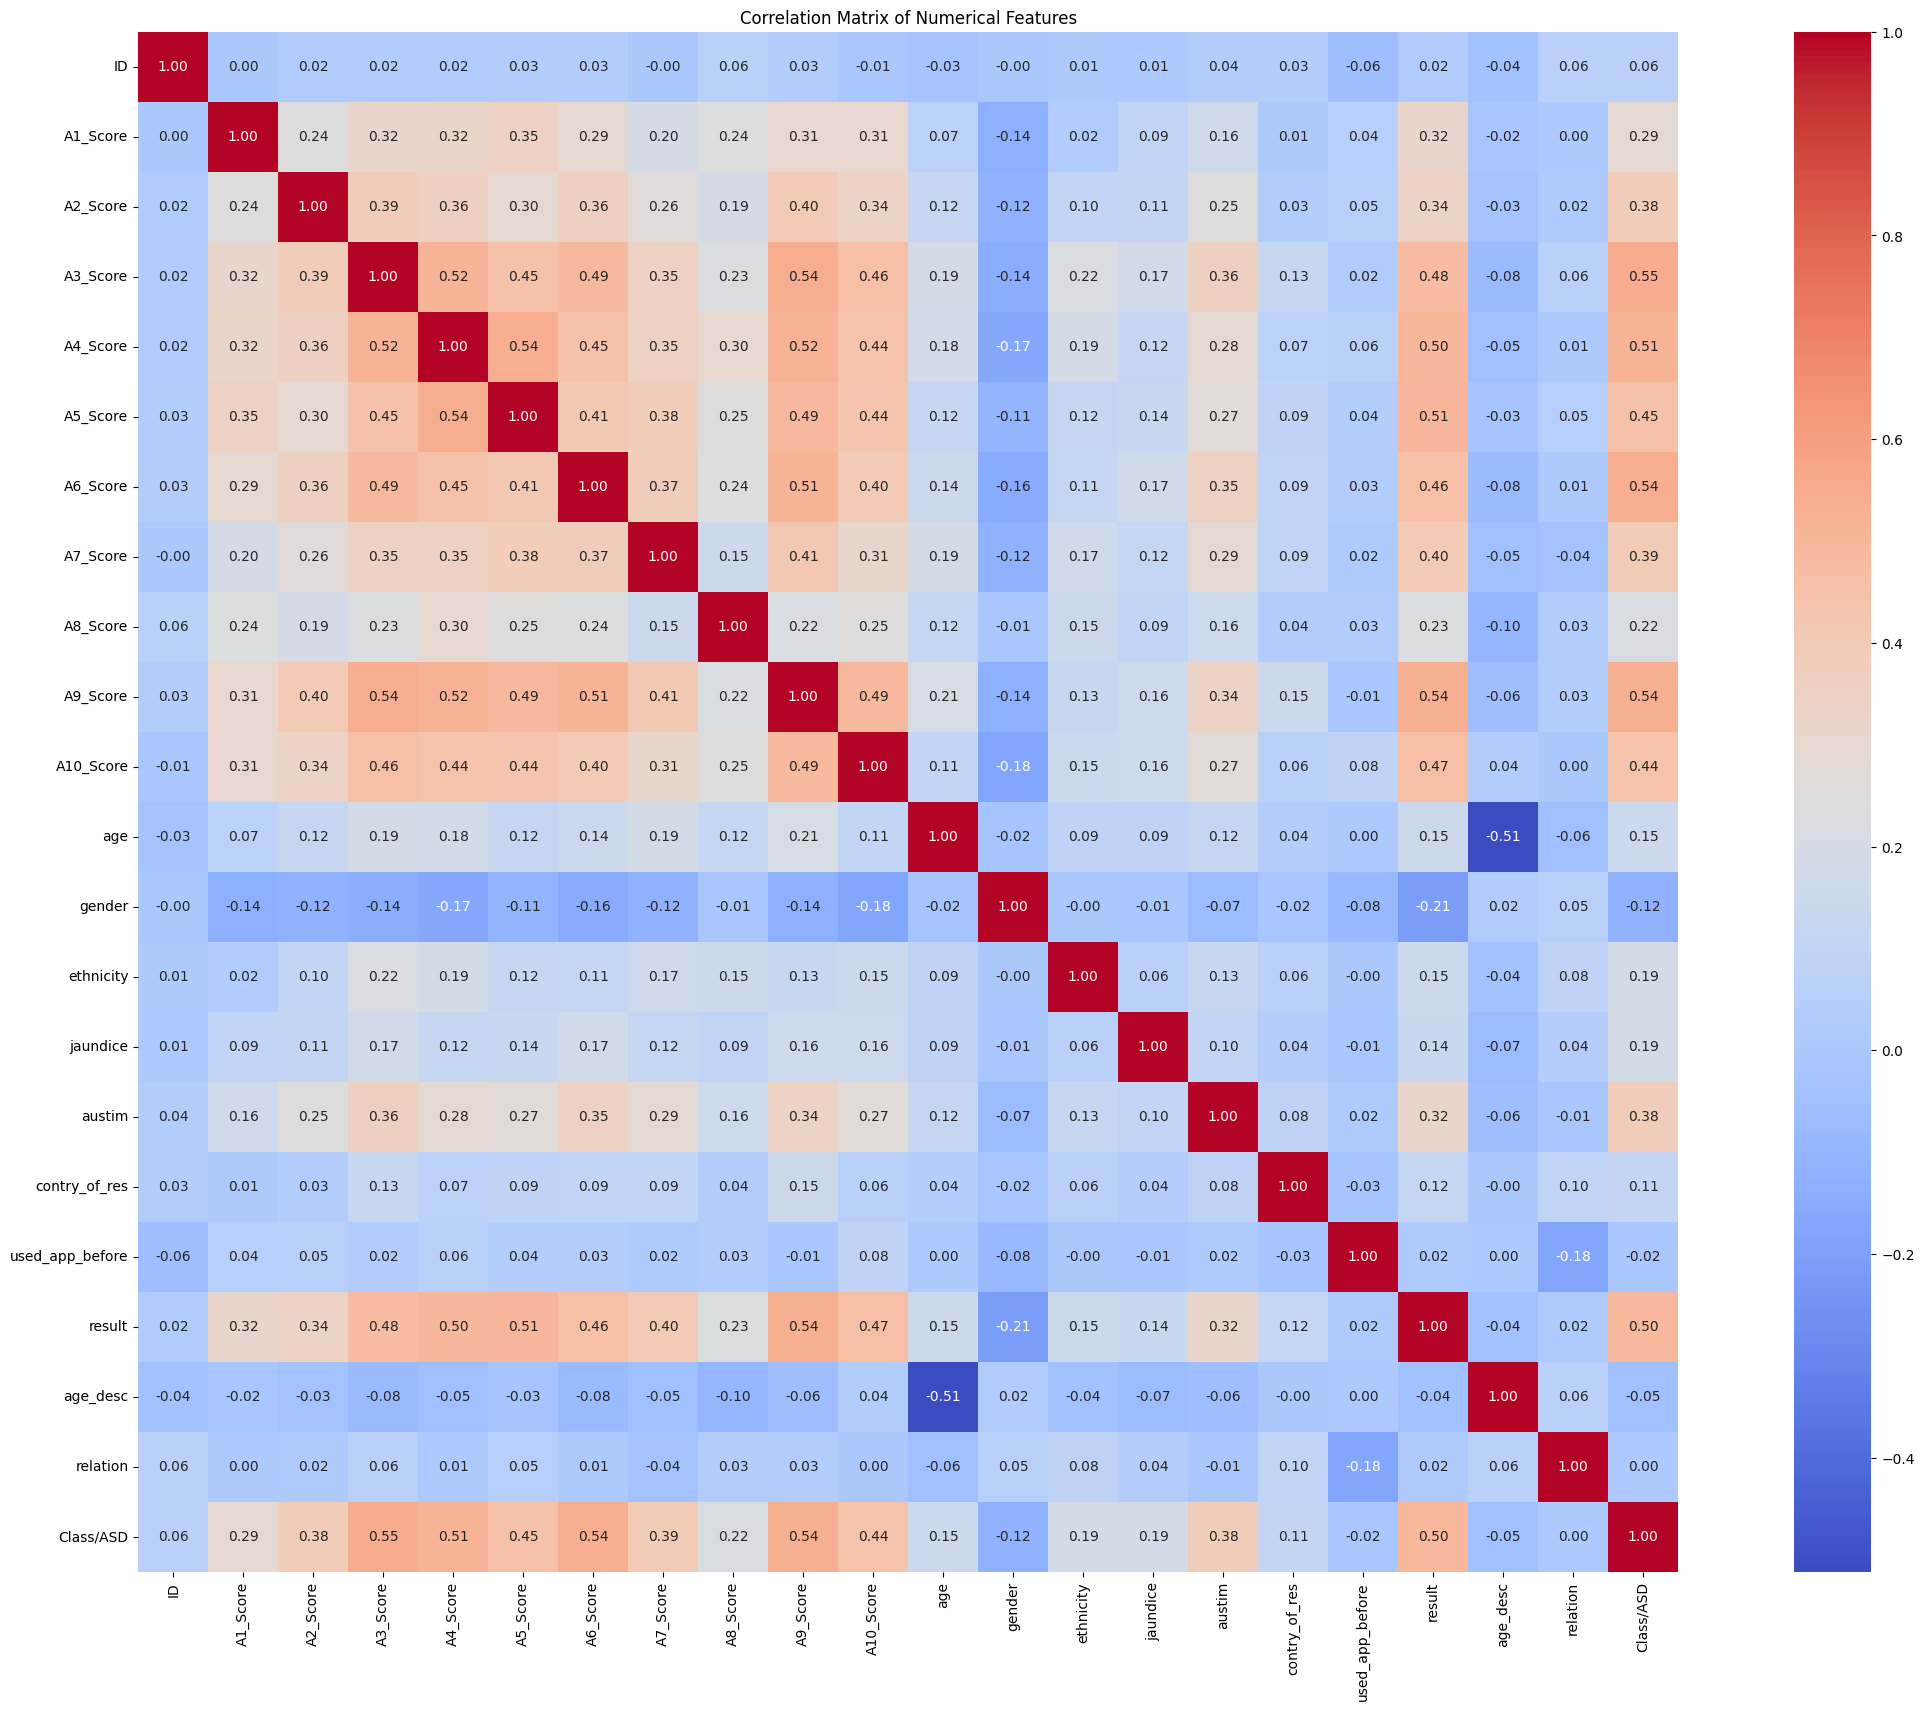

In [ ]:
plt.figure(figsize=(30, 20))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


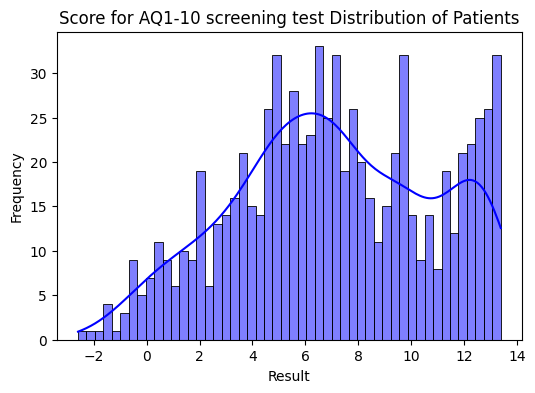

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['result'], bins=50, kde=True, color='blue')
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Score for AQ1-10 screening test Distribution of Patients')
plt.show()


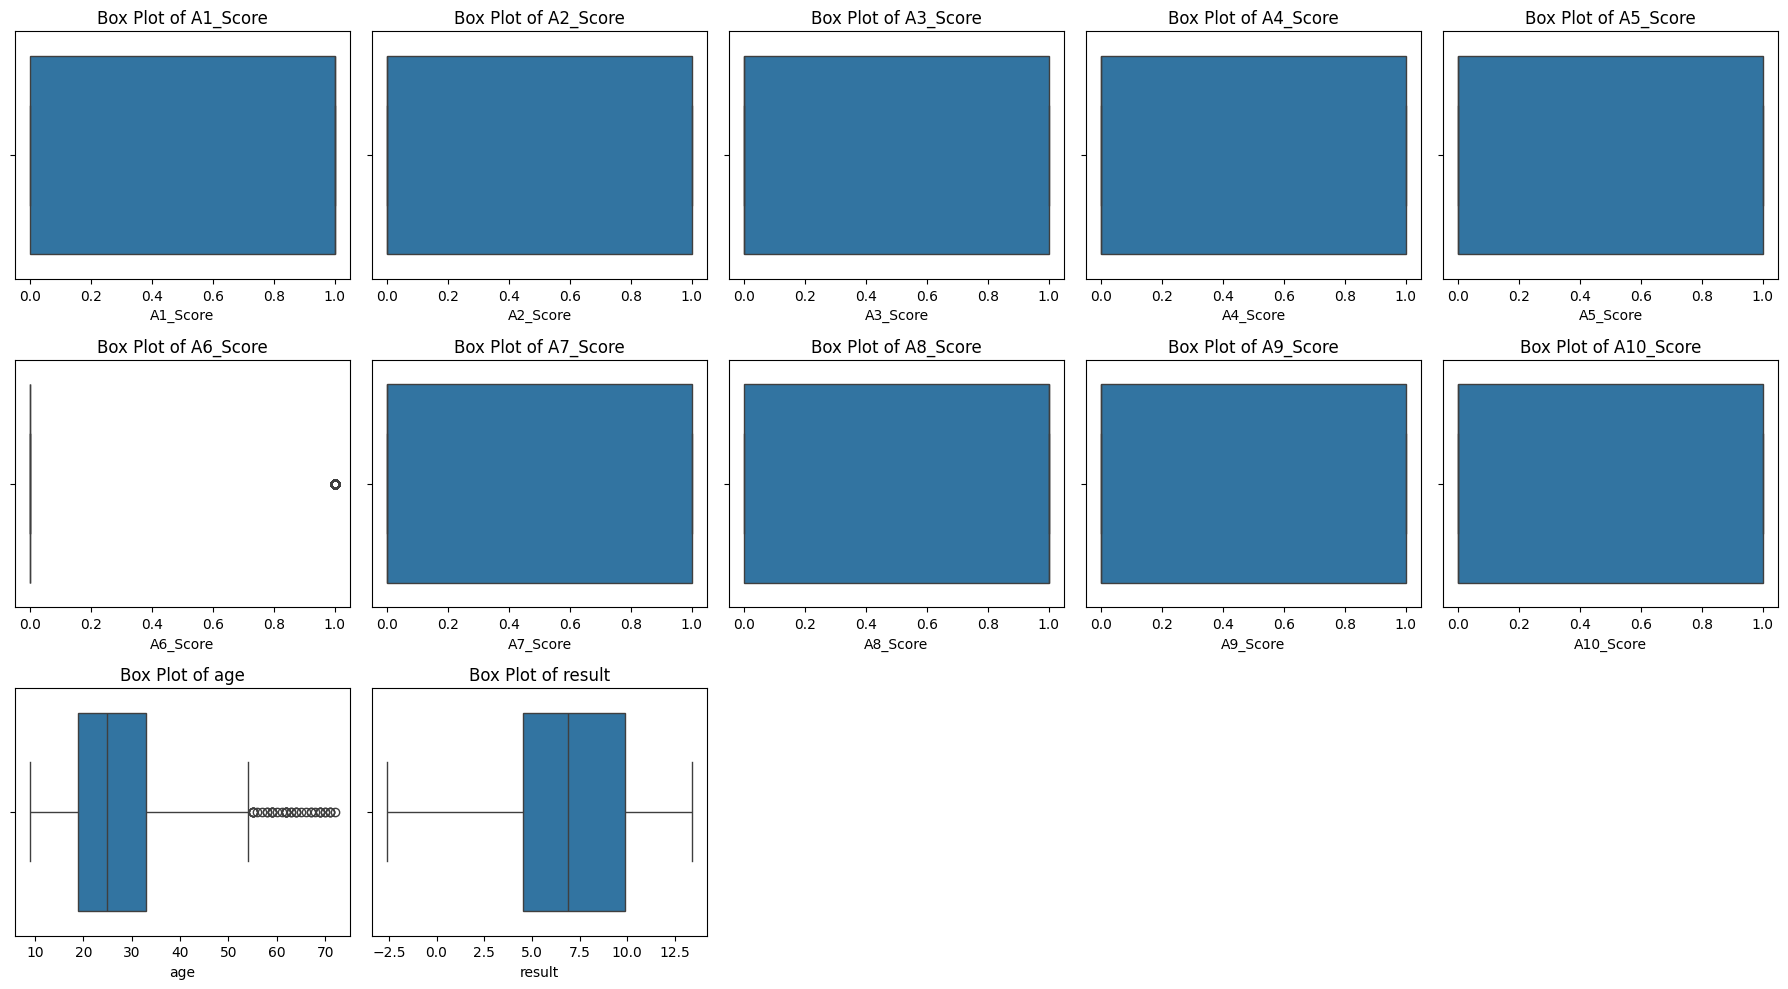

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = [ 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
                   'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
                   'result']

#create a DataFrame with only the numeric columns
numeric_data = df[numeric_columns]

#set up the figure and axes
plt.figure(figsize=(18, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

#loop through each numeric column to create box plots
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(x=numeric_data[col], orient='vertical')
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()
